# **EDA**

## Objectives

* Describe the data using basic statistics
* Use visualisations to explore the distribution, skew and kurtosis of numerical varaibles
* Use bar charts to explore the distribution of categorical variables
* Compare median clearance time of categorical variables 
* Compute statistical significance between variables of interest
* Use a correlation matrix to explore relationships 

## Inputs

* The dataset, "US_Accidents_For_EDA.csv", saved locally in "Data/EDA"

## Outputs

* The dataset, "US_Accidents_For_ML.csv", saved locally in "Data/ML" 

## Summary of Steps

* Load the dataset
* 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project'

---

## Required Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest
from feature_engine import transformation as vt
from statsmodels.graphics.gofplots import qqplot
import pingouin as pg
import math

---

## Load the Dataset

I will use Pandas to open the csv file.

In [26]:
df = pd.read_csv("Data/EDA/US_Accidents_For_EDA.csv")
pd.set_option("display.max_columns", None)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Clearance_Time(hr),Clearance_Class,Weather_Simplified,State_Other,Population,County_Other,Month
0,2,32.456486,-93.774536,0.501,Central,78.0,78.0,62.0,29.61,10.0,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Night,26.205833,Very Long,Fair,LA,187540,Caddo,Sep
1,2,36.804693,-76.189728,0.253,Eastern,54.0,54.0,90.0,30.40,7.0,CALM,0.0,0.0,False,False,True,False,False,False,False,False,False,False,True,Night,81.274444,Very Long,Fair,VA,459444,Virginia Beach,May
2,2,29.895741,-90.090026,1.154,Pacific,40.0,33.0,58.0,30.28,10.0,N,10.0,0.0,False,False,False,False,True,False,False,False,False,False,False,Day,8761.750000,Very Long,Cloudy,LA,440784,Jefferson,Jan
3,2,32.456459,-93.779709,0.016,Central,62.0,62.0,75.0,29.80,10.0,SSE,8.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Night,28.096667,Very Long,Cloudy,LA,187540,Caddo,Nov
4,2,26.966433,-82.255414,0.057,Eastern,84.0,84.0,69.0,29.99,10.0,E,18.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Day,27.260000,Very Long,Cloudy,FL,186824,Other,Sep


As far as I can ascertain, "Severity" is a rating system (impact score) and therefore ordinal categorical, so for the purposes of EDA, I will change its data type to "object". It will be changed back to number at the end of this notebook.

In [27]:
df["Severity"] = df["Severity"].astype("object")
df["Severity"].dtype

dtype('O')

---

## Descriptive Statistics

I am going to look at the descriptive statistics of the continuous numerical variables. This will give: the count (number of values); the mean, which is the central tendency, and standard deviation, which describes the variation or spread of data from the mean; the minimum and maximum values, together with the quartiles (Q), which describe the spread of the data by tshowing the values at which 25 % (Q1), 50 % (Q2) or 75 % (Q3) of the data falls within. The 50 % quartile is also known as the median.

In general, when data is normally distributed, the mean and standard deviation are used, while if data is skewed (not normally distributed), median and interquartile range are typically used to describe data.

A normal, or Gaussian distribution is a continuous probability distribution where the area under the curve = 1, and the mean = median = mode (most common value). The mean (peak) is in the center and the spread is symmetrically distributed about the mean. Additionally, 68 % of the data falls within 1 standard deviation of the mean, and 95 % and 99.7 % falls within 2 and 3 standard deviations, respectively.  

A positive skew occurs when the mean is great than the median, while a negative skew occurs when the mean is less than the median. Skewness is measured relative to a normal distribution, which has a skew of 0. 

Another measure is kurtosis, which describes the 'tailedness' and 'peakedness' of a distribution. A  normal distribution has an absolute kurtosis of 3, but kurtosis is measured relative to the normal distribution, so a kurtosis of less than 0 means lighter tails and a flatter peak compared to normal, while a kurtosis of more than 0 indicates heavier tails and a sharper peak compared to normal.  

Kurtosis also relates to the extent of outliers in the data; when tails are light, there are less outliers compared to a normal distribution, but when tails are heavy, there are more outliers. In normally distributed date, values outside 3 standard deviations can be considered outliers. When data is skewed, the interquartile range (IQR; Q3 - Q1), and those that fall outside the range Q1 - (1.5 * IQR) and Q3 + (1.5 * IQR), are considered outliers. 

While a value may be a statistical outlier, that doesn't mean it is not valid, as extreme values can and will occur. However, whenever possible, extreme values should be investigated further to understand whether an error in measurement or recording occurred.   

In [17]:
df.describe()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Clearance_Time(hr),Population
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9.960000e+03
mean,35.731321,-95.102106,0.937225,61.287430,60.001466,64.901004,29.295206,9.053608,7.388765,0.005092,239.888811,6.809507e+05
std,5.549589,16.939049,2.424480,18.732327,20.949519,22.854755,1.274070,2.790325,5.579474,0.036646,1396.189647,1.387282e+06
min,25.435661,-124.430507,0.000000,-17.000000,-36.000000,4.000000,20.330000,0.000000,0.000000,0.000000,0.091667,3.400000e+01
25%,32.461804,-116.338590,0.008000,49.000000,48.000000,49.000000,29.190000,10.000000,3.000000,0.000000,0.995278,6.105500e+04
50%,35.155197,-90.932593,0.181000,63.000000,63.000000,68.000000,29.730000,10.000000,7.000000,0.000000,3.038056,2.265250e+05
75%,40.034891,-80.414568,0.882000,75.000000,75.000000,84.000000,29.970000,10.000000,10.000000,0.000000,13.474653,6.525220e+05
max,48.999569,-68.732984,65.308000,112.000000,112.000000,100.000000,30.710000,75.000000,51.000000,1.670000,26304.992778,1.001740e+07


For this data:

- Start_Lat and Start_Lng: not continuous numerical in this sense
- Distance(mi): range is 0 - 65.3; the mean (0.94) is more than the median (0.18) and very far apart, and together with the interquartile range (0.008 - 0.8) suggests an extreme positive skew
- Temperature(F): range is -17 - 112; the mean (61.3) is less than the median (63.0) but close, and together with the interquartile range (49 - 75) suggests a small negative skew
- Wind_Chill(F): range is -36 - 112; the mean (60) is less than the median (63.0) but close, and together with the interquartile range (48 - 75) suggests some negative skew
- Humidity(%): range is 4 - 100; the mean (65.0) is less than the median (68.0) but close, and together with the interquartile range (49 - 84) suggests some negative skew
- Pressure(in): range is 20.3 - 30.7; the mean (29.3) is very close to the median (29.7), but the interquartile range (29.2 - 30.0) suggests a negative skew
- Visibility(mi): range is 0 - 75; the mean (9.1) is close to the median (10.0), but the interquartile range (10 - 10) suggests extreme positive skew
- Wind_Speed(mi): range is 0 - 51; the mean (7.4) is close to the median (7.0), but the interqurtile range (3 - 10) suggests a strong positive skew
- Precipitation(in): range is 0 - 1.67; the mean (0.005) is close to the median (0), but the interqurtile range (0 - 0) suggests a strong positive skew 
- Clearance_Time(hr): range is 0.01 - 26305; the mean (240.0) is extremely far from the median (3.0), which together with the interqurtile range (1.0 - 13.5) suggests an extreme positive skew
- Population: range is 34 - 1.0 x 10^7; the mean (6.8 x 10^5) is far from the median (2.3 x 10^5), which together with the interqurtile range (6.1 x 10^4 - 6.5 x 10^5) suggests an extreme positive skew 


---

## Distribution of Numerical Variables 

I will now visualise what is described above using a histogram, which automatically bins the data and plots the frequency of data that falls within the bins. I am also presenting a box plot that shows the interquartile range and whiskers, outside which outliers are shown as circles.

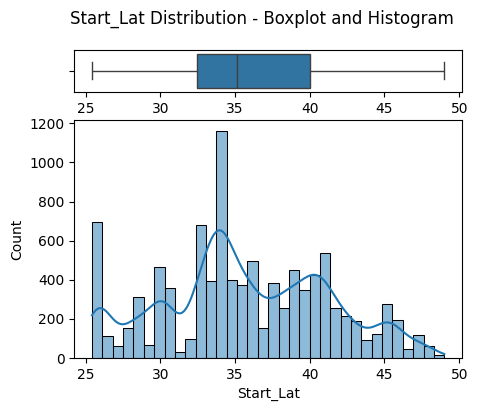

Start_Lat | Non-outlier range: 21.1 to 51.39
Start_Lat | skewness: 0.06 | kurtosis: -0.67




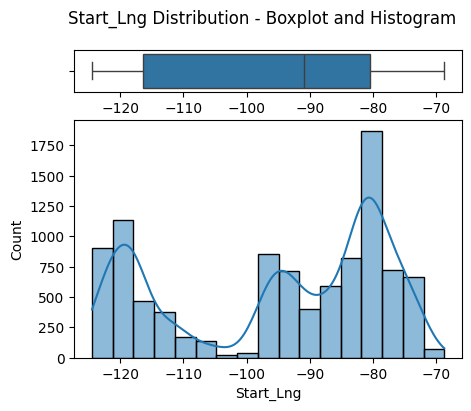

Start_Lng | Non-outlier range: -170.22 to -26.53
Start_Lng | skewness: -0.45 | kurtosis: -1.34




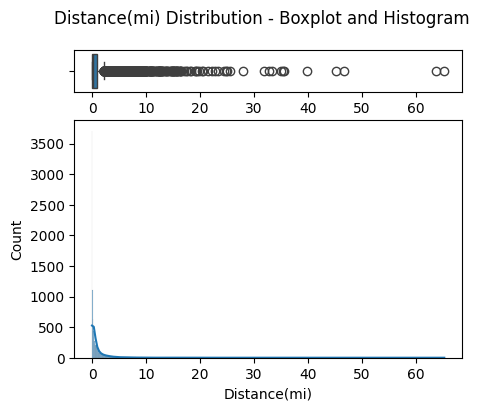

Distance(mi) | Non-outlier range: -1.3 to 2.19
Distance(mi) | skewness: 9.59 | kurtosis: 161.98




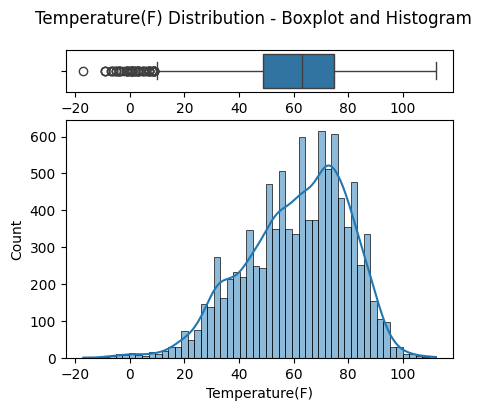

Temperature(F) | Non-outlier range: 10.0 to 114.0
Temperature(F) | skewness: -0.48 | kurtosis: -0.12




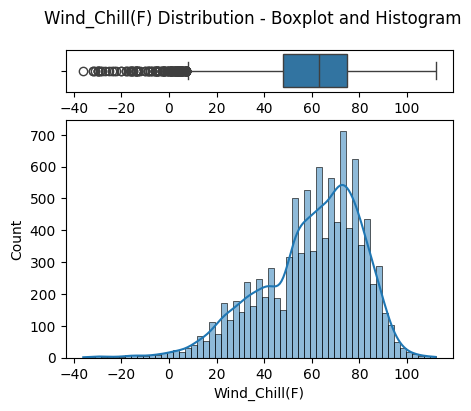

Wind_Chill(F) | Non-outlier range: 7.5 to 115.5
Wind_Chill(F) | skewness: -0.76 | kurtosis: 0.47




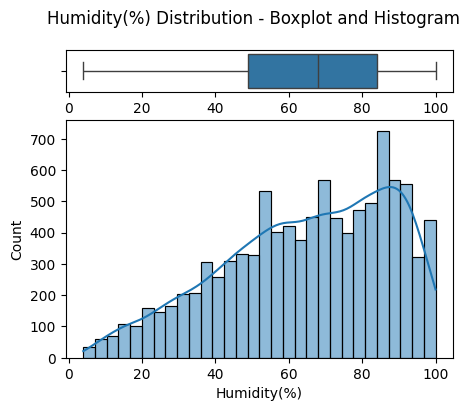

Humidity(%) | Non-outlier range: -3.5 to 136.5
Humidity(%) | skewness: -0.47 | kurtosis: -0.64




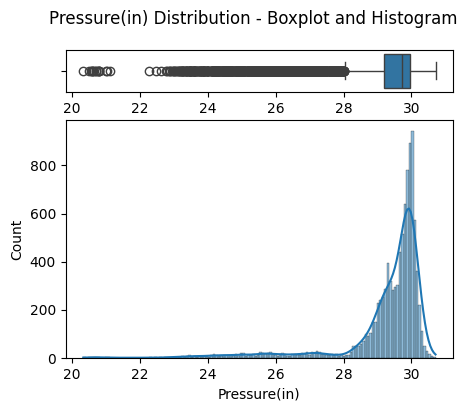

Pressure(in) | Non-outlier range: 28.02 to 31.14
Pressure(in) | skewness: -2.96 | kurtosis: 9.84




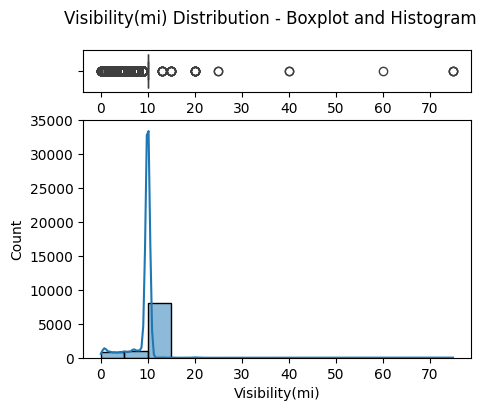

Visibility(mi) | Non-outlier range: 10.0 to 10.0
Visibility(mi) | skewness: 3.35 | kurtosis: 110.14




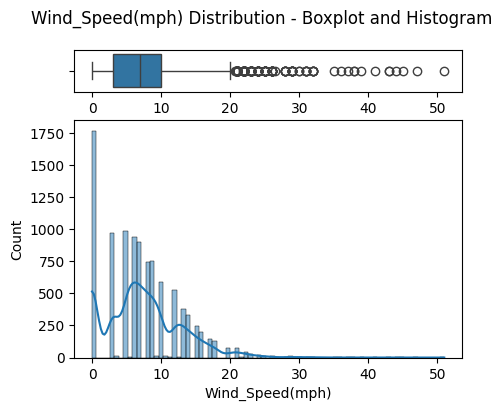

Wind_Speed(mph) | Non-outlier range: -7.5 to 20.5
Wind_Speed(mph) | skewness: 0.94 | kurtosis: 2.24




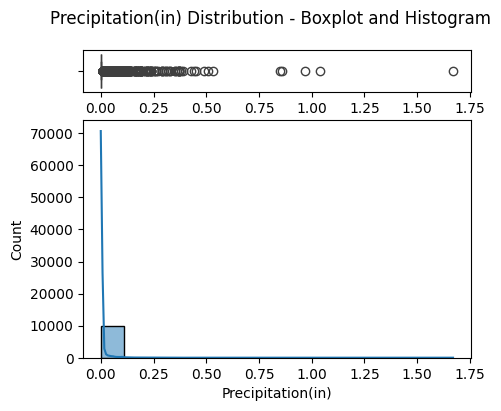

Precipitation(in) | Non-outlier range: 0.0 to 0.0
Precipitation(in) | skewness: 19.88 | kurtosis: 631.72




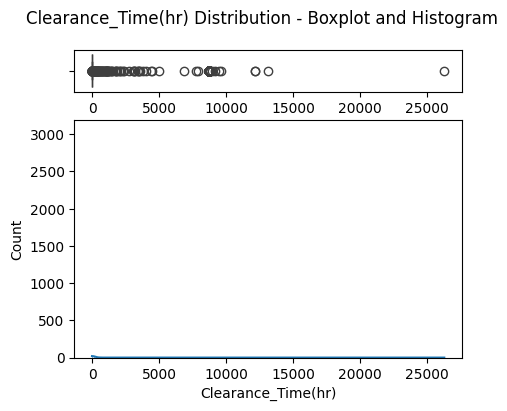

Clearance_Time(hr) | Non-outlier range: -17.72 to 32.19
Clearance_Time(hr) | skewness: 6.4 | kurtosis: 44.79




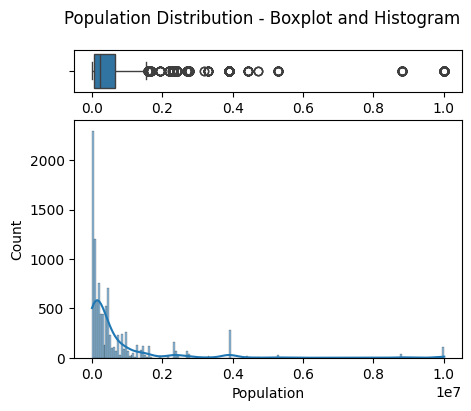

Population | Non-outlier range: -826145.5 to 1539722.5
Population | skewness: 4.55 | kurtosis: 24.73




In [18]:
def plot_histogram_and_boxplot(df):
    for col in df.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(5,4), 
                                 gridspec_kw={"height_ratios": (.15, .85)})
        
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[0])
        
        # Histogram
        sns.histplot(data=df, x=col, kde=True, ax=axes[1])
        
        # Title
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
        plt.show()

        # Outlier range
        IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
        print(
            f"{col} | Non-outlier range: "
            f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
            f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}"
        )

        # Skewness & Kurtosis just for this column
        print(f"{col} | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")
        print("\n")


plot_histogram_and_boxplot(df)

I can see that the histogram for "Clearance_Time(hr) doesn't display the data as expected, because of the distribution. In the section below, I will perform transformations so that the data can be visualised. 

As described above, I can see that, in order of positive skewness from most to least, "Precipitation(in)", "Distance(mi)", "Clearance_Time(hr)", "Population", "Visibility(mi)" and "Wind_Speed(mi)". While, in order of negative skewness from most to least, are "Pressure(in)", "Wind_Chill(F)", "Temperature(F)" and "Humidity(%)". 

In order of most to least kurtosis; with positive values are "Precipitation(in)", "Distance(mi)", "Visibility(mi)", "Clearance_Time(hr)", "Population", "Pressure(in)" and "Wind_Speed(mi)"; and with negative values are "Humidity(%)", "Wind_Chill(F)" and "Temperature(F)". 

I can see that all of the continuous numerical data except "Humidity(%)" have numerous statistical outliers, but are within valid ranges for the measurement being considered. Therefore, I will be keeping all data as they are rather than capping them. If there is time, I would like to run the ML model with capped data to see if it performs better or worse.   

Below, I am conducting the D’Agostino and Pearson’s test to confirm deviation from normality. The null hypothesis is that the data from a normal distribution, while the alternative hypothesis is that it doesn't. If p < 0.05, we reject the null hypothesis and accept the alternative, that the data does not come from a normal distribution. The metric "Statistic" is a measure of the deviation from mornal. The greater the value, the greater the deviation.

In [ ]:
df_numeric = df.select_dtypes(include='number')

for col in df_numeric.columns:
    stat, p = normaltest(df_numeric[col].dropna())
    print(f"{col}: Statistic={stat:.3f}, p={p:.3f}")


Start_Lat: Statistic=469.933, p=0.000
Start_Lng: Statistic=415514.274, p=0.000
Distance(mi): Statistic=15337.934, p=0.000
Temperature(F): Statistic=356.665, p=0.000
Wind_Chill(F): Statistic=831.489, p=0.000
Humidity(%): Statistic=722.953, p=0.000
Pressure(in): Statistic=6154.519, p=0.000
Visibility(mi): Statistic=8970.933, p=0.000
Wind_Speed(mph): Statistic=1601.115, p=0.000
Precipitation(in): Statistic=21850.425, p=0.000
Clearance_Time(hr): Statistic=11644.284, p=0.000
Population: Statistic=9141.113, p=0.000


In all cases, I see that the hull hypothesis is rejected; the data doesn't come from a normal distribution.  

ML algorithms, in particular those that are based on distance, correlation or linearity, do not handle skewed data very well. On the other hand, decision tree based model are minimally affected. For this reason, I intend to model the dataset with non-transformated and transformed numeric data to see which performs better.

For this purpose, in the notebook "Number_Feature_Transformations" I investigate which transformation works best for each variable.

---

## Transformation of Clearance Times

I am going to transform "Clearance_Time(hr)" for better visualisations. I have chosen to use the Yeo Johnson transformer here, as it is one of the most flexible general-purpose power transformers that works well across a range of distributions.

I'm going to create a new DataFrame with the transformed values and visualise, to ensure it works well, before adding as a new column on the main DataFrame.

In [28]:
df_filtered = df.filter(["Clearance_Time(hr)"])
df_filtered.head()

,Clearance_Time(hr)
0,26.205833
1,81.274444
2,8761.750000
3,28.096667
4,27.260000


In [29]:
# Create and fit transformer
yj = vt.YeoJohnsonTransformer(variables=["Clearance_Time(hr)"])  # or leave empty for all numeric

# Transform the data
df_transformed = yj.fit_transform(df_filtered)

df_transformed.head()

,Clearance_Time(hr)
0,1.894681
1,2.157362
2,2.579619
3,1.913922
4,1.905627


The code below will display a histogram of the transformed "Clearance_Time(hr) data, values for skew and kurtosis, as well as a quantile-quantile (QQ) plot, which is a tool for assessing distributions. In this case I am assessing how closely the data resembles a theoretical, normal distribtion (the diagonal straight line).  

*** Clearance_Time(hr) ***


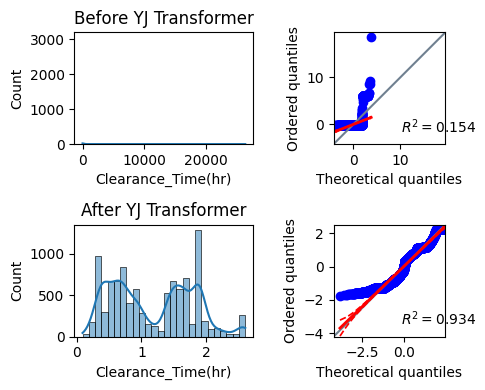

before transformation  | skewness: 6.4 | kurtosis: 44.79
after transformation  | skewness: 0.24 | kurtosis: -1.09




In [30]:
def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")

def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,4))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0,0])
    axes[0,0].set_title(f'Before {method}')
    pg.qqplot(df[col], dist='norm',ax=axes[0,1])
    
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1,0])
    axes[1,0].set_title(f'After {method}')
    pg.qqplot(df_transformed[col], dist='norm',ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()

    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")


compare_distributions_before_and_after_applying_transformer(df_filtered, df_transformed, method='YJ Transformer')

I can see that the Yeo Jognson transformer has worked well; skewness and kurtosis are greatly reduced, and the R^2 value, a measure of how closely the data aligns with the theoretical normal distribution, where 1 = perfect alignment, is equal to 0.934, showing very good alignment.

I am going to add the column "CT_Transformed" for the purposes of data visualisation only. It will not be used for statistical testing or carried forward for analysis.

In [31]:
yj = vt.YeoJohnsonTransformer(variables=['Clearance_Time(hr)'])
df['CT_Transformed'] = yj.fit_transform(df[['Clearance_Time(hr)']])
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Clearance_Time(hr),Clearance_Class,Weather_Simplified,State_Other,Population,County_Other,Month,CT_Transformed
0,2,32.456486,-93.774536,0.501,Central,78.0,78.0,62.0,29.61,10.0,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Night,26.205833,Very Long,Fair,LA,187540,Caddo,Sep,1.894681
1,2,36.804693,-76.189728,0.253,Eastern,54.0,54.0,90.0,30.40,7.0,CALM,0.0,0.0,False,False,True,False,False,False,False,False,False,False,True,Night,81.274444,Very Long,Fair,VA,459444,Virginia Beach,May,2.157362
2,2,29.895741,-90.090026,1.154,Pacific,40.0,33.0,58.0,30.28,10.0,N,10.0,0.0,False,False,False,False,True,False,False,False,False,False,False,Day,8761.750000,Very Long,Cloudy,LA,440784,Jefferson,Jan,2.579619
3,2,32.456459,-93.779709,0.016,Central,62.0,62.0,75.0,29.80,10.0,SSE,8.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Night,28.096667,Very Long,Cloudy,LA,187540,Caddo,Nov,1.913922
4,2,26.966433,-82.255414,0.057,Eastern,84.0,84.0,69.0,29.99,10.0,E,18.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Day,27.260000,Very Long,Cloudy,FL,186824,Other,Sep,1.905627


---

## KDE Plots by Clearance Class

I'm going to use Seaborn KDE plots to view distributions by clearance class. This will give me the first insight into possible difference between the target classes. 

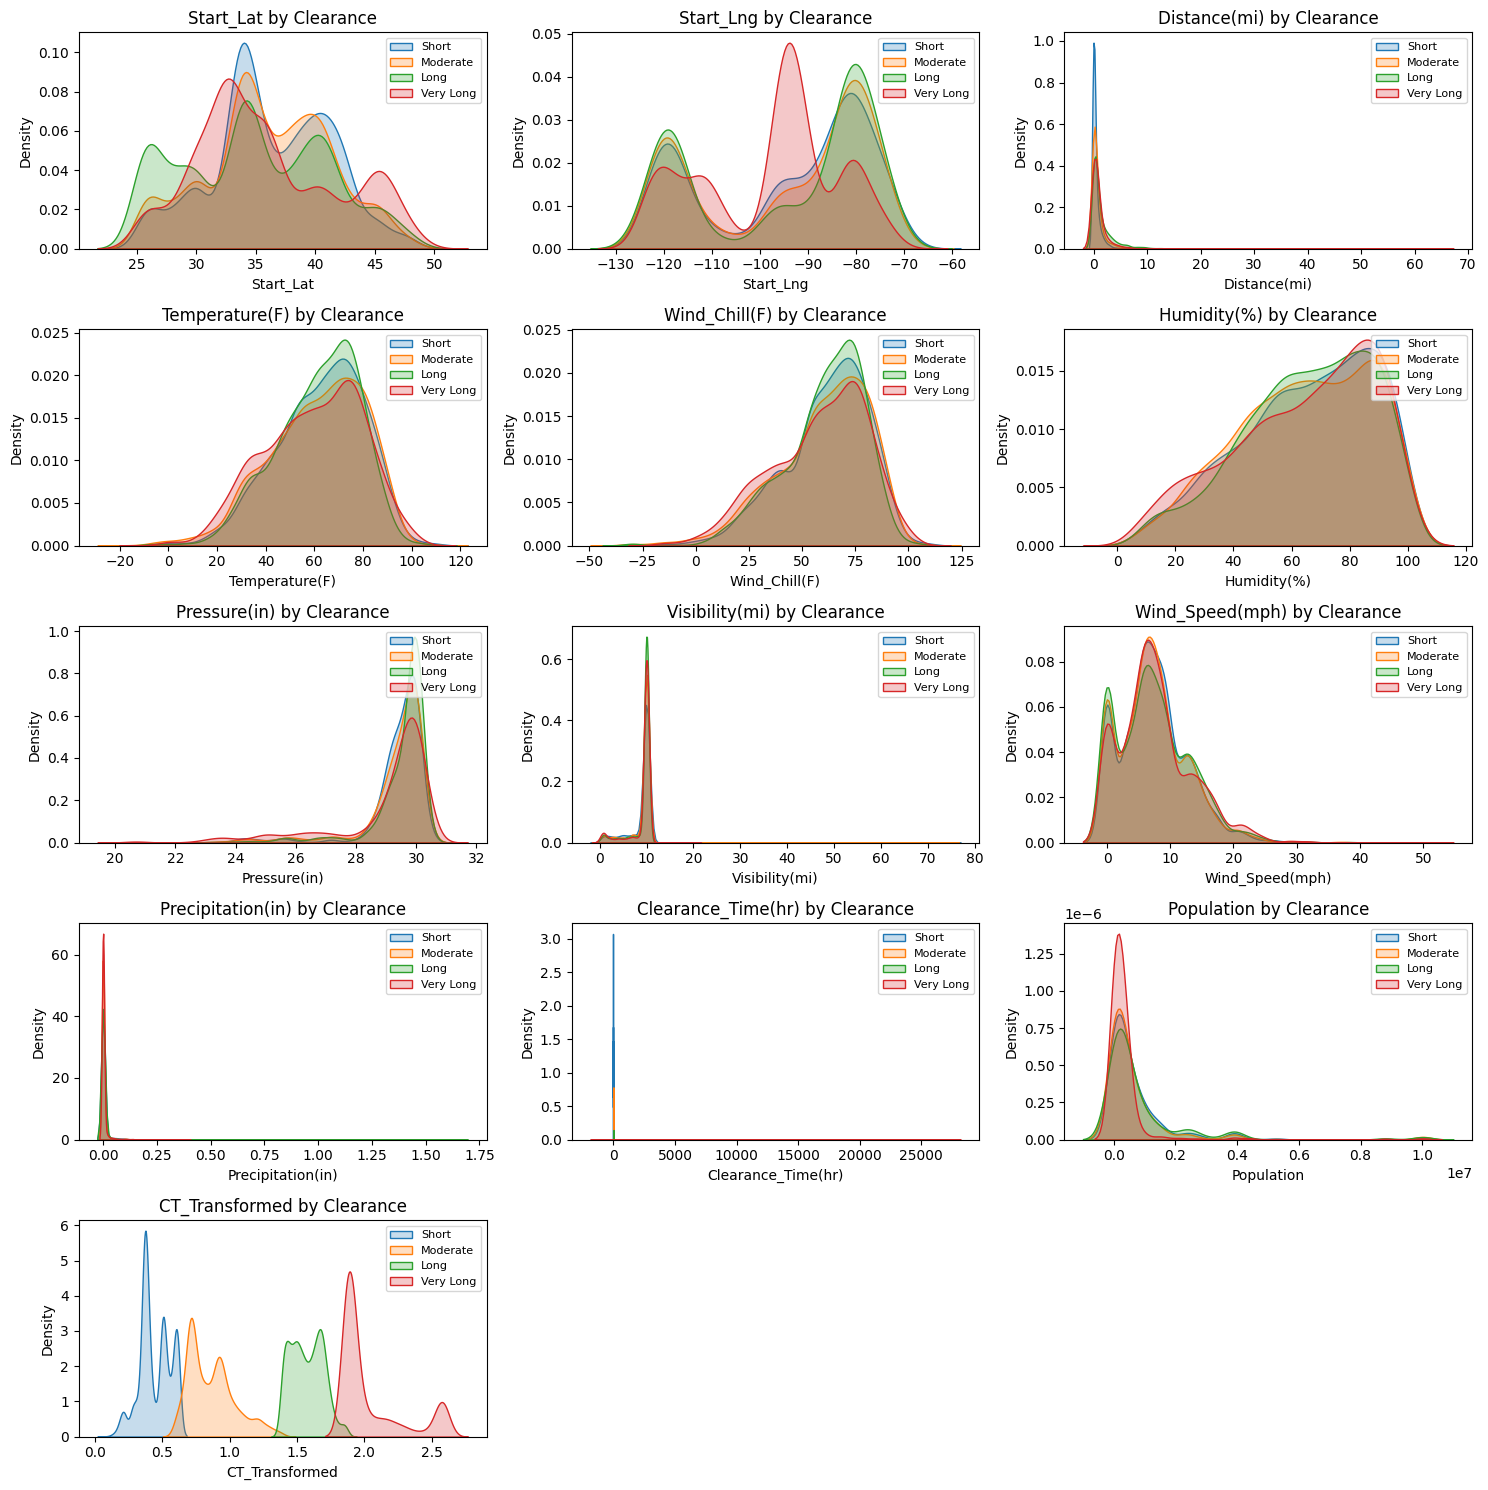

In [34]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Grid layout
n_cols = 3  # number of plots across
n_rows = math.ceil(len(num_cols) / n_cols)  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df[df['Clearance_Class']=="Short"], x=col, label='Short', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Clearance_Class']=="Moderate"], x=col, label='Moderate', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Clearance_Class']=="Long"], x=col, label='Long', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Clearance_Class']=="Very Long"], x=col, label='Very Long', fill=True, ax=axes[i])

    axes[i].set_title(f'{col} by Clearance')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend(fontsize=8)

# If there are empty subplots, remove them
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Of interest, these distributions indicate that "Start_Lat" and "Start_Lng" offer the best separation of clearance class in numeric variables, while environmental conditions appear to offer very little separation.

---